# Name - Jitendra Lekhwani
# Task - unemployment analysis with python

In [1]:
# importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading data
df=pd.read_csv("C:/csv files/oasis/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## performing basic operations on the data

In [3]:
df.shape

(768, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [6]:
#checking for null values in the dataset
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
#dropping null values in the dataset
df.dropna(inplace=True)

In [8]:
#now checking for the null values in the dataset
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
#Now there are no null values in the dataset

In [10]:
#checking for duplicated values in the dataset
df.duplicated().sum()

0

In [11]:
#There are no duplicate values in the dataset

In [12]:
df.columns = df.columns.str.strip()

In [13]:
#converting date column into datetime object
from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x.strip(), '%d-%m-%Y'))

In [14]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


### From the above summary we can see that the maximum unemplyment rate is 76.74% which is very huge.
### Also we can see that the maximum labour participation is 72.57%

## Basic operations on columns

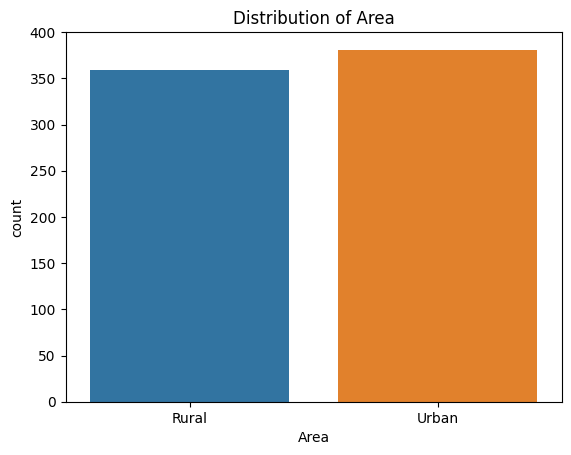

In [15]:
#estimating number of rural and urban areas according to the data
sns.countplot(x=df['Area'],data=df)
plt.title('Distribution of Area')
plt.show()

In [16]:
#We can see that there is somewhat equal distribution of rural and urban areas in our dataset

In [17]:
#filtering the data based on rural and urban criteria
urban_data=df[df['Area']=='Urban']
rural_data=df[df['Area']=='Rural']

In [18]:
#printing the list of states that come under urban area
l1=urban_data['Region'].unique().tolist()
len(l1)

28

In [19]:
#printing the list of states that come under rural area
l2=rural_data['Region'].unique().tolist()
len(l2)

27

## Analysing Trend based on month

In [20]:
#for rural areas
#calculating mean for each month for rural areas
rural_monthly_mean=rural_data.groupby(['Date'])['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)': 'avg_estimated_unemployment_rate'})

In [21]:
rural_monthly_mean=rural_monthly_mean.sort_values('Date')

In [22]:
rural_monthly_mean.head(15)

,Date,avg_estimated_unemployment_rate
0,2019-05-31,7.068077
1,2019-06-30,8.201154
2,2019-07-31,7.741923
3,2019-08-31,8.503077
4,2019-09-30,7.036800
5,2019-10-31,9.051111
6,2019-11-30,8.432222
7,2019-12-31,8.233600
8,2020-01-31,7.842692
9,2020-02-29,8.752308


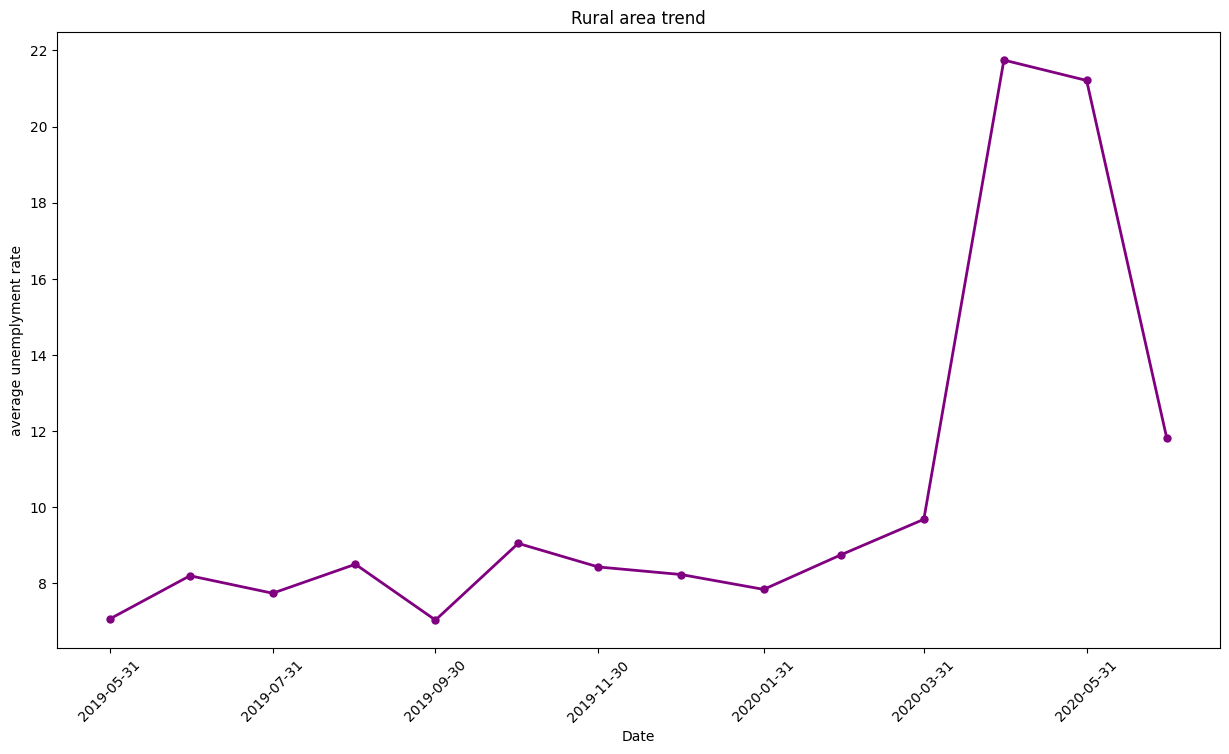

In [23]:
#ploting the trend using line plot
plt.figure(figsize=(15,8))
plt.plot(rural_monthly_mean['Date'],rural_monthly_mean['avg_estimated_unemployment_rate'],color='purple',linewidth=2,marker='o',markersize=5)
plt.xlabel('Date')
plt.xticks(rural_monthly_mean['Date'][::2], rotation=45)
plt.ylabel('average unemplyment rate')
# plt.yticks(range(0, 11, 1))
plt.title('Rural area trend')
plt.show()

In [24]:
''' From the above graph we can see that the maximum unemployment rate is in the month of april 2020 because this was the time when
Corona first wave strikes india and lockdown was declared 
Minimum unemployment rate is in the month of september 2019
From the graph we can also see that the steep decline in the unemployment rate in the month of june 2020 when lockdown was 
starting to remove in stages'''

' From the above graph we can see that the maximum unemployment rate is in the month of april 2020 because this was the time when\nCorona first wave strikes india and lockdown was declared \nMinimum unemployment rate is in the month of september 2019\nFrom the graph we can also see that the steep decline in the unemployment rate in the month of june 2020 when lockdown was \nstarting to remove in stages'

In [25]:
#for urban areas
#calculating mean for each month for urban areas
urban_monthly_mean=urban_data.groupby(['Date'])['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns={'Estimated Unemployment Rate (%)': 'avg_estimated_unemployment_rate'})

In [26]:
urban_monthly_mean=urban_monthly_mean.sort_values('Date')

In [27]:
urban_monthly_mean.head()

,Date,avg_estimated_unemployment_rate
0,2019-05-31,10.551429
1,2019-06-30,10.326786
2,2019-07-31,10.233571
3,2019-08-31,10.730741
4,2019-09-30,10.917407


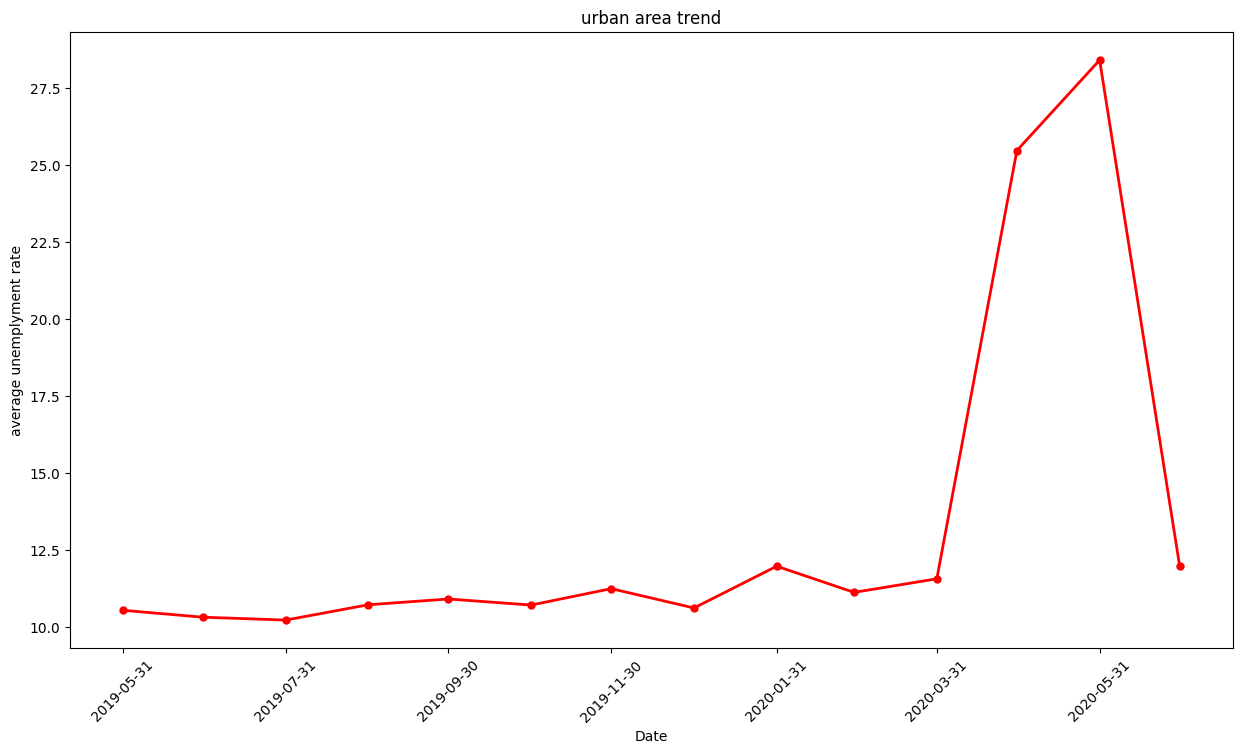

In [28]:
#ploting the trend using line plot
plt.figure(figsize=(15,8))
plt.plot(urban_monthly_mean['Date'],urban_monthly_mean['avg_estimated_unemployment_rate'],color='red',linewidth=2,marker='o',markersize=5)
plt.xlabel('Date')
plt.xticks(urban_monthly_mean['Date'][::2], rotation=45)
plt.ylabel('average unemplyment rate')
# plt.yticks(range(0, 11, 1))
plt.title('urban area trend')
plt.show()

In [29]:
'''From the graph we can see that from may 2019 to march 2020 the average unemplyment rate is between 10% to 12.5% 
In April 2020 the unemployment rate increase drastically to more than 25% which increased further in may 2020
In june 2020 we can see that there is steep fall in unemployment rate due to removal of lockdown by the goverment'''

'From the graph we can see that from may 2019 to march 2020 the average unemplyment rate is between 10% to 12.5% \nIn April 2020 the unemployment rate increase drastically to more than 25% which increased further in may 2020\nIn june 2020 we can see that there is steep fall in unemployment rate due to removal of lockdown by the goverment'

### From the trend analysis we can see that there is similarity between rural and urban trend 
### However the unemplyment rate is more in urban areas as compared to the rural areas This is mainly due to high population in urban areas

## State wise analysis of estimated employed

In [30]:
#for rural area
rural_state_employed=rural_data.groupby(['Region'])['Estimated Employed'].mean().reset_index().rename(columns={'Estimated Employed': 'avg_estimated_employed'})

In [31]:
rural_state_employed=rural_state_employed.sort_values('avg_estimated_employed',ascending=False)

In [32]:
top_5=rural_state_employed.head()
top_5['avg_estimated_employed']=top_5['avg_estimated_employed'].astype(int)
low_5=rural_state_employed.tail()
low_5['avg_estimated_employed']=low_5['avg_estimated_employed'].astype(int)

C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\731038051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['avg_estimated_employed']=top_5['avg_estimated_employed'].astype(int)
C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\731038051.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_5['avg_estimated_employed']=low_5['avg_estimated_employed'].astype(int)


C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\609932370.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_5['Region'],rotation=45)
C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\609932370.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(low_5['Region'],rotation=45)


Text(0.5, 1.0, 'Lowest 5 states')

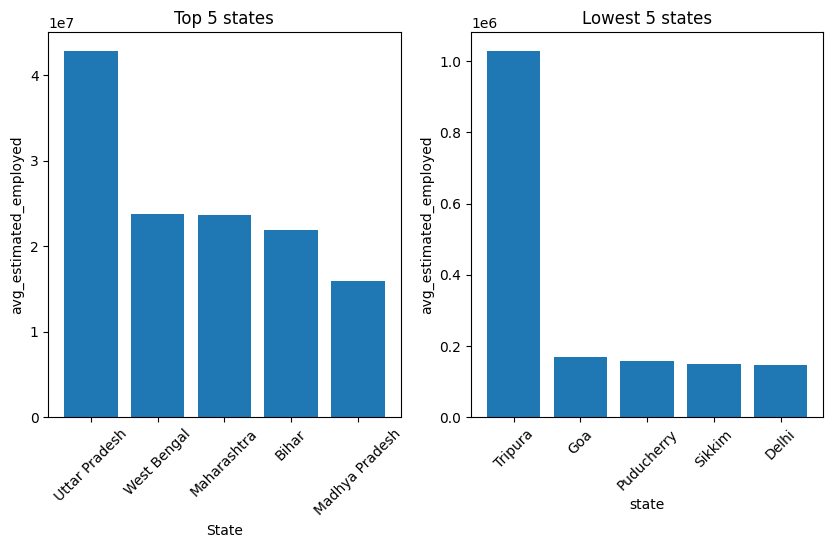

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first subplot
ax1.bar(top_5['Region'], top_5['avg_estimated_employed'])
ax1.set_xlabel('State')
ax1.set_xticklabels(top_5['Region'],rotation=45)
ax1.set_ylabel('avg_estimated_employed')
ax1.set_title('Top 5 states')

# Plot the second subplot
ax2.bar(low_5['Region'], low_5['avg_estimated_employed'])
ax2.set_xlabel('state')
ax2.set_xticklabels(low_5['Region'],rotation=45)
ax2.set_ylabel('avg_estimated_employed')
ax2.set_title('Lowest 5 states')

In [34]:
'''From the above bar graph we can see that the uttarpradesh has the highest number of empoyed people followed by
West bengal and maharashtra'''
'''Also the state with lowest amount of employed people is Delhi followed by sikkim and puducherry'''

'Also the state with lowest amount of employed people is Delhi followed by sikkim and puducherry'

In [35]:
#for urban area
urban_state_employed=urban_data.groupby(['Region'])['Estimated Employed'].mean().reset_index().rename(columns={'Estimated Employed': 'avg_estimated_employed'})

In [36]:
urban_state_employed=urban_state_employed.sort_values('avg_estimated_employed',ascending=False)

In [37]:
Top_5=urban_state_employed.head()
Top_5['avg_estimated_employed']=Top_5['avg_estimated_employed'].astype(int)
lowest_5=urban_state_employed.tail()
lowest_5['avg_estimated_employed']=lowest_5['avg_estimated_employed'].astype(int)

C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\3620304157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Top_5['avg_estimated_employed']=Top_5['avg_estimated_employed'].astype(int)
C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\3620304157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lowest_5['avg_estimated_employed']=lowest_5['avg_estimated_employed'].astype(int)


C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\1340603446.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  a1.set_xticklabels(Top_5['Region'],rotation=45)
C:\Users\simran lekhwani\AppData\Local\Temp\ipykernel_15500\1340603446.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a2.set_xticklabels(lowest_5['Region'],rotation=45)


Text(0.5, 1.0, 'Lowest 5 states')

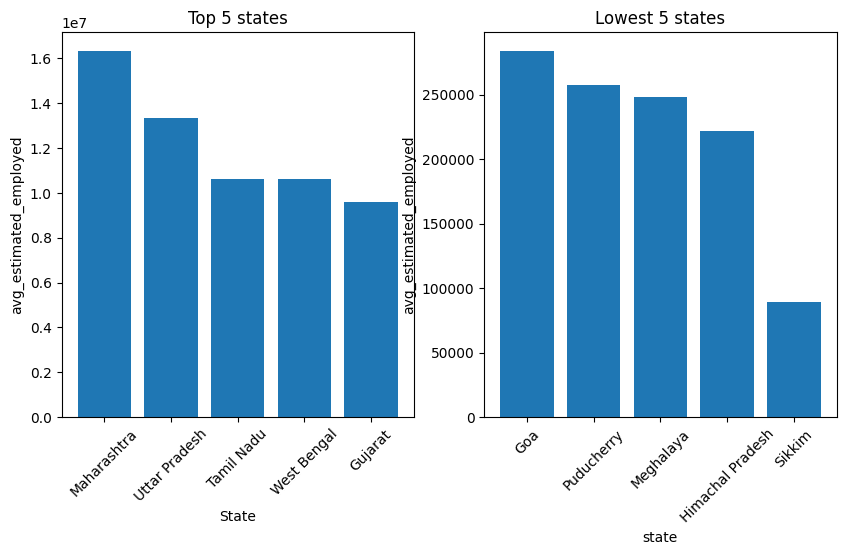

In [38]:
fig, (a1, a2) = plt.subplots(1, 2, figsize=(10, 5))
# Plot the first subplot
a1.bar(Top_5['Region'], Top_5['avg_estimated_employed'])
a1.set_xlabel('State')
a1.set_xticklabels(Top_5['Region'],rotation=45)
a1.set_ylabel('avg_estimated_employed')
a1.set_title('Top 5 states')

# Plot the second subplot
a2.bar(lowest_5['Region'], lowest_5['avg_estimated_employed'])
a2.set_xlabel('state')
a2.set_xticklabels(lowest_5['Region'],rotation=45)
a2.set_ylabel('avg_estimated_employed')
a2.set_title('Lowest 5 states')

In [39]:
'''From the above bar graph we can see that the Maharashtra has the highest number of employed people followed by
uttarpradesh and tamilnadu'''
'''Also the state with lowest amount of employed people is sikkim followed by himachal pradesh and meghalaya'''

'Also the state with lowest amount of employed people is sikkim followed by himachal pradesh and meghalaya'

## Analysing relationship between estimated employed and estimated labour participation rate

In [55]:
# for rural area
rel1=rural_data[['Estimated Employed','Estimated Labour Participation Rate (%)']]

In [56]:
rel1.head()

,Estimated Employed,Estimated Labour Participation Rate (%)
0,11999139.0,43.24
1,11755881.0,42.05
2,12086707.0,43.50
3,12285693.0,43.97
4,12256762.0,44.68


In [57]:
corr=rel1.corr()
corr

,Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Employed,1.000000,-0.050949
Estimated Labour Participation Rate (%),-0.050949,1.000000


<AxesSubplot: title={'center': 'Scatter Plot of Employment and Labour Participation Rate'}, xlabel='Estimated Employed', ylabel='Estimated Labour Participation Rate (%)'>

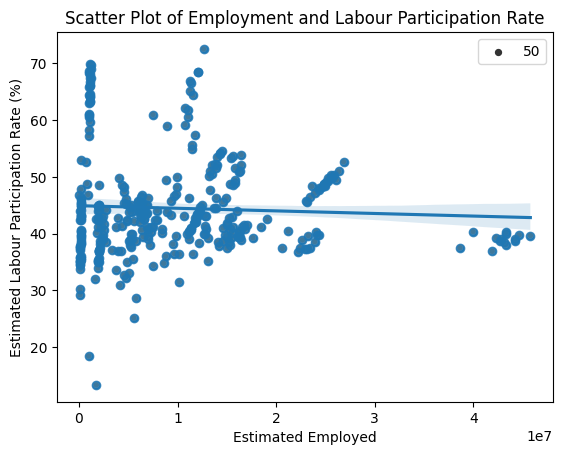

In [58]:
#ploting the scatter plot to see the relationship visually
sns.scatterplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', data=rural_data)
plt.xlabel('Estimated Employment')
plt.ylabel('Estimated Labour Participation Rate')
plt.title('Scatter Plot of Employment and Labour Participation Rate')
sns.scatterplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', alpha=0.7, size=50, data=rural_data)
sns.regplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', data=rural_data)

In [59]:
#The graph clearly indicates a weak negative correlation between estimted employed and estimated labour participation rate

In [60]:
#for urban area
rel2=urban_data[['Estimated Employed','Estimated Labour Participation Rate (%)']]

In [61]:
rel2.head()

,Estimated Employed,Estimated Labour Participation Rate (%)
373,4788661.0,37.45
374,4824630.0,36.76
375,4657443.0,36.10
376,4743179.0,36.29
377,4733996.0,36.69


In [62]:
corr=rel2.corr()
corr

,Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Employed,1.00000,-0.14518
Estimated Labour Participation Rate (%),-0.14518,1.00000


<AxesSubplot: title={'center': 'Scatter Plot of Employment and Labour Participation Rate'}, xlabel='Estimated Employed', ylabel='Estimated Labour Participation Rate (%)'>

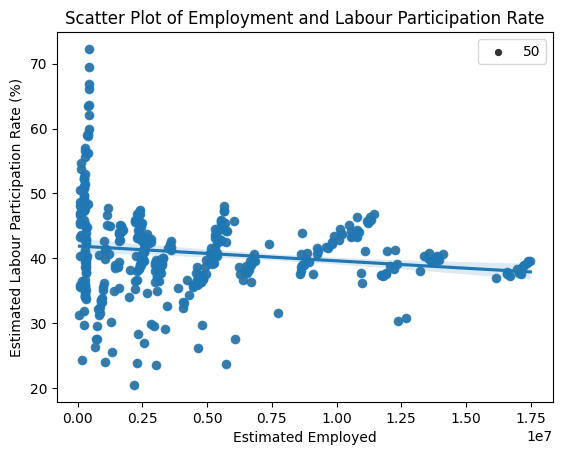

In [63]:
#ploting the scatter plot to see the relationship visually
sns.scatterplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', data=urban_data)
plt.xlabel('Estimated Employment')
plt.ylabel('Estimated Labour Participation Rate')
plt.title('Scatter Plot of Employment and Labour Participation Rate')
sns.scatterplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', alpha=0.7, size=50, data=urban_data)
sns.regplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', data=urban_data)

In [64]:
#The graph clearly indicates a weak negative correlation between estimted employed and estimated labour participation rate